# NAME: MOHD HAMD                                                                                     

# IOT & COMPUTER VISION INTERN

# THE SPARKS FOUNDATION

### JUNE 2021




## Task : Color identification of images


# Importing useful libraries

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os



# Working with OpenCv

The type of this input is <class 'numpy.ndarray'>
Shape: (400, 600, 3)


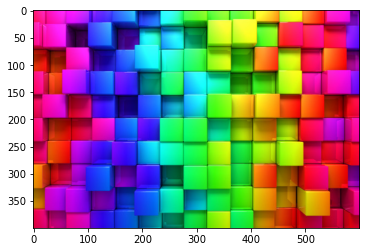

In [4]:
image = cv2.imread('sample.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)
#Converting BGR color space to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Resizing images

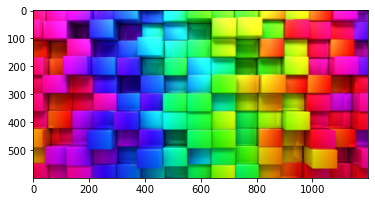

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# RGB to Hex Conversion

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))



# Read image in RGB color space

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


# Get colors from an image

In [8]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors


# Calling our functions

[array([200.06479676, 211.31228135,  19.91018854]),
 array([ 25.4111167 , 218.83750057, 204.56712529]),
 array([ 53.52375185,  47.91997046, 234.86454948]),
 array([ 41.04940581, 206.27261224,  49.30157901]),
 array([137.89070866,  37.2980315 ,  18.48401575]),
 array([ 26.46633361,  44.05747381, 110.32459437]),
 array([215.85994804,  13.32656297, 193.99331961]),
 array([228.66848427,  30.13874401,  46.91968284])]

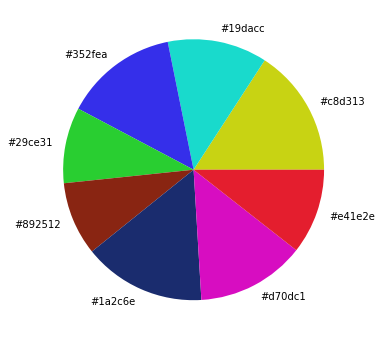

In [9]:
get_colors(get_image('sample.jpg'), 8, True)

# The above pie chart showing types of  colors in image